## **Results of Solar Panel Defection by Model Accuracy**



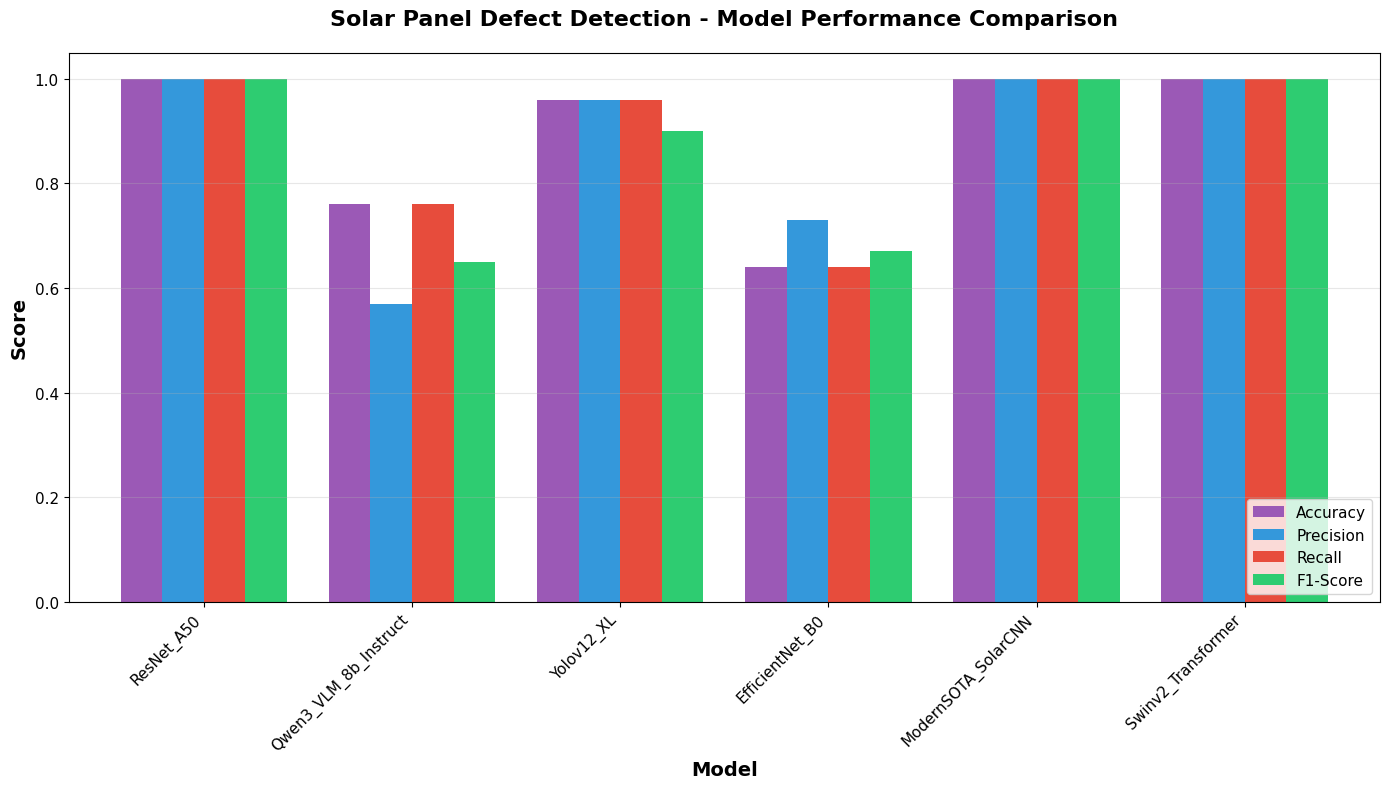

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Preparing the Data**

In [2]:
#Check if the path exists
import os
if not os.path.exists("/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data/Solar Panels.v2i.yolov12.zip"):
    print("Path does not exist")
else:
  print("Path exists")

Path exists


In [5]:
import os

# Solar Zip Images Path
solar_path_zip = "/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data/Solar Panels.v2i.yolov12.zip"

# Move The Path Back (All the Files)
solar_path_unzipped = "/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data"

# Unzip into solar_path_unzipped, with paths enclosed in quotes
!unzip -q "{solar_path_zip}" -d "{solar_path_unzipped}"
print("Unzip command executed. Check the specified directory for extracted files.")


replace /content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data/README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data/test/images/05_jpg.rf.5a8b436234cdbce3511c7510a2d54d22.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data/test/images/08_jpg.rf.5f6b08f22ca766423fe509c22a539354.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace

## **Fine Tuning YOLOv12**

In [1]:
# PIp install ultralytics
!pip install ultralytics

In [1]:
from ultralytics import YOLO

model = YOLO('yolo12x.pt')

In [2]:
# Modify a new yaml based off the train, val, and test set paths in google drive
import yaml

dataset_path = '/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data'  # adjust this

# Load and modify
with open(f'{dataset_path}/data.yaml', 'r') as f:
    data = yaml.safe_load(f)

# Update image paths to absolute
data['train'] = f'{dataset_path}/train/images'
data['val'] = f'{dataset_path}/valid/images'  # Roboflow often uses 'valid' not 'val'
data['test'] = f'{dataset_path}/test/images'

# Save modified yaml
with open(f'{dataset_path}/data_colab.yaml', 'w') as f:
    yaml.dump(data, f)

print(data)

{'train': '/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data/train/images', 'val': '/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data/valid/images', 'test': '/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data/test/images', 'nc': 2, 'names': ['Crack', 'hotspot'], 'roboflow': {'workspace': 'automated-solar-panel-defect-detection-using-cameraintegrated-cleaning-robots', 'project': 'solar-panels-3it8x', 'version': 2, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/automated-solar-panel-defect-detection-using-cameraintegrated-cleaning-robots/solar-panels-3it8x/dataset/2'}}


In [3]:
# Train the Model
results = model.train(
    data=f'{dataset_path}/data.yaml',
    epochs=10,
    imgsz=640,  # Reduced from 1648 to 640 to fix OutOfMemoryError
    batch=-1 # Auto Max Bench
)

# Models folder path
models_path = "/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Models"
# Save the model weights to models_path
model.save(f'{models_path}/yolo12s_colab.pt')


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, n

# **Qwen 3 VLM Fine tuned**

In [4]:
!nvidia-smi

Fri Nov 28 02:43:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   59C    P0             30W /   72W |    4295MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
%%capture
import os
import re

# Install dependencies
!pip install unsloth

In [2]:
# Step 1: Load in Qwen3 VL 8B Instruct through Unsloth with 4bits
import unsloth
from unsloth import FastVisionModel
import torch

model_name = "Unsloth/Qwen3-VL-8B-Instruct-unsloth-bnb-4bit" # base 8B VL is alredy quantized (faster download + less strain on L4 GPU)
max_seq_length = 16384 # tokenizer context; VLMs can go long
load_in_4bit = True
dtype = torch.bfloat16

model, tokenizer = FastVisionModel.from_pretrained(
    model_name=model_name,
    max_seq_length=max_seq_length,
    load_in_4bit=load_in_4bit,
    dtype=dtype
)

print(f"Loaded model {model_name} with dtype {dtype}")

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.11.4: Fast Qwen3_Vl patching. Transformers: 4.57.2.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu126. CUDA: 8.9. CUDA Toolkit: 12.6. Triton: 3.5.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loaded model Unsloth/Qwen3-VL-8B-Instruct-unsloth-bnb-4bit with dtype torch.bfloat16


In [3]:
# Step 2: Load in LoRA Adapter
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers=True,
    finetune_language_layers=True,
    finetune_attention_modules=True,
    finetune_mlp_modules=True,
    r=16,
    lora_alpha=16, # The amount of parameters to be trained by LoRA can be determined by r and lora_alpha, where r is the rank of the LoRA matrix and lora_alpha is the scaling factor. The formula is r * lora_alpha.
    lora_dropout=0.05,
    bias="none",
    use_gradient_checkpointing="unsloth", # Saves RAM
    random_state=42
)

Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.05.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.


In [4]:
# Step 3: Load class names from yaml
import yaml

# Step 3a.) Define the dataset path
dataset_path = '/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data'  # adjust this

with open(f'{dataset_path}/data.yaml', 'r') as f:
    data_config = yaml.safe_load(f)

class_names = data_config['names']
print(class_names)

['Crack', 'hotspot']


In [5]:
# Step 4: Minimal dataset prep
from datasets import Dataset
from PIL import Image
import os

def load_vl_dataset(split):
    images_dir = f"{dataset_path}/{split}/images"
    labels_dir = f"{dataset_path}/{split}/labels"

    # Take the first 100 images and labels since otherwise it would crash
    image_files = os.listdir(images_dir)[:100]

    samples = []
    for img_file in os.listdir(images_dir):
        # Print img file processing
        print(f"Processing {img_file}")

        # Skip non-image files
        if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = f"{labels_dir}/{label_file}"

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                class_ids = [int(line.split()[0]) for line in f.readlines()]
                print(f"Class IDs: {class_ids}")

            # 0 represents Crack, 1 represents hotspot
            defects = [class_names[i] for i in class_ids]

            samples.append({
                'image_path': f"{images_dir}/{img_file}",  # path only, not loaded
                'defects': ', '.join(defects) if defects else "No defects detected"
            })

    return Dataset.from_list(samples)

train_dataset = load_vl_dataset('train')
val_dataset = load_vl_dataset('valid')
test_dataset = load_vl_dataset('test')

print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}")

Streaming output truncated to the last 5000 lines.
Class IDs: [0, 0]
Processing crack_234_jpg.rf.93d6fb75b96ce1ae1c9db6693d6f7f1a.jpg
Class IDs: [0]
Processing crack_212_jpg.rf.3af5cc24922e555d76b2c2e2c4d9197c.jpg
Class IDs: [0]
Processing crack_224_jpg.rf.1c6ed45abf424ba183ea42c7de9b50a9.jpg
Class IDs: [0, 0]
Processing crack_266_jpg.rf.41c816c42117270df658e84e16a5a1c9.jpg
Class IDs: [0]
Processing crack_263_jpg.rf.6528f20c45d830e0e240db2842aab606.jpg
Class IDs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Processing 27_jpg.rf.750057ad3a4f099db0c8a9dd255ecf15.jpg
Class IDs: [1, 1, 1]
Processing Physical-damaged-36-_jpg.rf.64d302d23714cd4b359f8a89c1141ea7.jpg
Class IDs: [0]
Processing 16_jpg.rf.4560952fa69e09812dac797b1be03579.jpg
Class IDs: [1, 1, 1, 1]
Processing Physical-12-_jpg.rf.73b21d39e528f2db6cab124b793a4187.jpg
Class IDs: [0, 0]
Processing 64_jpg.rf.7fdadc45e504ea31942276f4aa56332c.jpg
Class IDs: [0]
Processing 20_jpg.rf.f4d65607b8439ccd684905f96e986bbd.jpg
Class IDs: [0, 0]
Proce

In [6]:
# Step 5: Format on-the-fly during training
from PIL import Image

# Rename 'defects' to 'messages' so SFTTrainer sees the correct column name
if 'defects' in train_dataset.column_names:
    train_dataset = train_dataset.rename_column("defects", "messages")
if 'defects' in val_dataset.column_names:
    val_dataset = val_dataset.rename_column("defects", "messages")

def format_sample(batch):
    """Lazy transformation function that processes a batch of samples"""
    output_messages = []
    # batch['messages'] currently holds the defect strings (renamed from defects)
    for img_path, defect_text in zip(batch["image_path"], batch["messages"]):
        try:
            image = Image.open(img_path).convert("RGB")
            output_messages.append([
                {"role": "user", "content": [
                    {"type": "image", "image": image},
                    {"type": "text", "text": "What defects are visible in this solar panel image?"}
                ]},
                {"role": "assistant", "content": [
                    {"type": "text", "text": f"This solar panel shows: {defect_text}"}
                ]}
            ])
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
            # Return a placeholder to avoid crashing the batch
            output_messages.append([
                 {"role": "user", "content": [{"type": "text", "text": "Error loading image."}]},
                 {"role": "assistant", "content": [{"type": "text", "text": "Error"}]}
            ])

    return {"messages": output_messages}

# Cut train dataset and val dataset in half to speed up epoch time (optional but kept from your code)
train_dataset = train_dataset.select(range(len(train_dataset) // 2))
# FIX: Use len(val_dataset) for the validation set to avoid index out of range errors
val_dataset = val_dataset.select(range(len(val_dataset) // 2))

# Apply lazy transform (loads images only when needed)
train_dataset.set_transform(format_sample)
val_dataset.set_transform(format_sample)

print("Datasets prepared with lazy loading.")

Datasets prepared with lazy loading.


In [19]:
# Print trainable parameters with PeFT command
model.print_trainable_parameters()

# 1. Enable gradient checkpointing
model.gradient_checkpointing_enable()

# 2. Disable cache (necessary for gradient checkpointing to work correctly during training)
model.config.use_cache = False

# 3. (Optional but recommended for PEFT) Enable input gradients if needed
model.enable_input_require_grads()

trainable params: 51,346,944 || all params: 8,818,470,640 || trainable%: 0.5823


In [36]:
# Step 6: Train
from unsloth import is_bfloat16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

# Enable the Model for training
FastVisionModel.for_training(model)

training_args = SFTConfig(
    output_dir="./Qwen3_8B_VLM_LoRA_Fine_Tuned",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    max_steps=100,
    warmup_ratio=0.03,
    group_by_length=False,
    lr_scheduler_type="constant",
    learning_rate=2e-4,
    fp16=not is_bfloat16_supported(),
    bf16=is_bfloat16_supported(),
    logging_steps=10,
    save_strategy="epoch",
    optim="adamw_8bit",
    dataset_text_field="messages",
)

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    data_collator=UnslothVisionDataCollator(model, tokenizer), # Must uee!
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

# Step 7: Save the model weights in the output_dir
trainer.save_model()


The model is already on multiple devices. Skipping the move to device specified in `args`.


Unsloth: Model does not have a default image size - using 512


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 577 | Num Epochs = 2 | Total steps = 100
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 51,346,944 of 8,818,470,640 (0.58% trained)


Step,Training Loss
10,0.020600
20,0.018300
30,0.028700
40,0.024300
50,0.022700
60,0.018500
70,0.011600
80,0.007900
90,0.013500
100,0.012200


train/epoch,▁▂▃▃▄▅▆▆▇██
train/global_step,▁▂▃▃▄▅▆▆▇██
train/grad_norm,▅▂█▁▅▂▃▄▁▃
train/learning_rate,▁▁▁▁▁▁▁▁▁▁
train/loss,▅▅█▇▆▅▂▁▃▂
total_flos,1.10218781420352e+16
train/epoch,1.3737
train/global_step,100
train/grad_norm,0.10508
train/learning_rate,0.0002
train/loss,0.0122


# **Building ConvXNet**

In [1]:
# Step 1: Load the dataset with a custom dataset loader
from datasets import load_dataset, Dataset, DatasetDict
from PIL import Image
import os

def load_custom_dataset(data_dir):
    images_dir = os.path.join(data_dir, "images")
    labels_dir = os.path.join(data_dir, "labels")

    data = {"image": [], "label": []}

    for img_file in os.listdir(images_dir):
        if not img_file.endswith(('.jpg', '.png', '.jpeg')):
            continue

        img_path = os.path.join(images_dir, img_file)
        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(labels_dir, label_file)

        if os.path.exists(label_path):
            image = Image.open(img_path).convert("RGB")

            with open(label_path, "r") as f:
                lines = f.readlines()

                # HANDLE EMPTY OR MALFORMED FILES
                if not lines or len(lines) == 0:
                    print(f"WARNING: Empty label file {label_file}, skipping")
                    continue

                first_line = lines[0].strip()

                if not first_line or len(first_line.split()) == 0:
                    print(f"WARNING: Malformed label in {label_file}, skipping")
                    continue

                # Get first number (class ID)
                class_id = int(first_line.split()[0])

            data["image"].append(image)
            data["label"].append(class_id)
        else:
            print(f"WARNING: No label file for {img_file}")

    return Dataset.from_dict(data)

# Create dataset_path so it's not so long for loading in train, val, test
dataset_path = "/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data"
train_dataset = load_custom_dataset(os.path.join(dataset_path, "train"))
val_dataset = load_custom_dataset(os.path.join(dataset_path, "valid"))
test_dataset = load_custom_dataset(os.path.join(dataset_path, "test"))

In [25]:
# Step 2: Preprocessing function
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
import numpy as np

def preprocess_function(examples):
    """Process images for the model"""
    images = [img for img in examples["image"]]
    inputs = image_processor(images, return_tensors="pt")
    inputs["labels"] = torch.tensor(examples["label"])
    return inputs

# Apply preprocessing
train_dataset = train_dataset.map(preprocess_function, batched=True, remove_columns=["image"])
val_dataset = val_dataset.map(preprocess_function, batched=True, remove_columns=["image"])

Map:   0%|          | 0/2305 [00:00<?, ? examples/s]

Map:   0%|          | 0/329 [00:00<?, ? examples/s]

In [28]:
# Step 3: Import AutoImage Processor and ConvNextV2ForImageclassification pretrained and load in ConvNextV2
from transformers import AutoImageProcessor, ConvNextV2ForImageClassification

model_name = "facebook/convnextv2-base-22k-224"

# Step 3a.) Make sure model is loaded with the correct number of classes
num_classes = len(set(train_dataset["label"]))
print(f"Training ConvNextV2 with {num_classes} classes")

id2label = {i: f"class_{i}" for i in range(num_classes)}
label2id = {f"class_{i}": i for i in range(num_classes)}

image_processor = AutoImageProcessor.from_pretrained(model_name)
model = ConvNextV2ForImageClassification.from_pretrained(
    model_name,
    num_labels=num_classes,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
)

Training ConvNextV2 with 2 classes


Some weights of ConvNextV2ForImageClassification were not initialized from the model checkpoint at facebook/convnextv2-base-22k-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
# Step 4: Define metrics
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [30]:
# Step 5: Training arguments
training_args = TrainingArguments(
    output_dir="./convnextv2-solar-panel-finetuned",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_dir='./logs',
    logging_steps=10,
    optim="adamw_torch",
    remove_unused_columns=False,
    push_to_hub=False,
    save_total_limit=2,
    warmup_ratio=0.1,
    fp16=True,  # Enable mixed precision if you have a GPU
)

# Step 6: Create Trainer with model, training_args, train/val dataset, compute_metrics, and image_preprocessor
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    test_dataset=test_dataset,
    compute_metrics=compute_metrics,
    tokenizer=image_processor,
)

# Step 7: Save the model
trainer.save_model("./convnextv2-solar-panel-final")
image_processor.save_pretrained("./convnextv2-solar-panel-final")

/tmp/ipython-input-256812130.py:24: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


['./convnextv2-solar-panel-final/preprocessor_config.json']

In [31]:
# Check your actual labels
print("Unique labels in train:", set(train_dataset['label']))
print("Unique labels in val:", set(val_dataset['label']))

# Check model's expected classes
print("Model num_labels:", model.config.num_labels)

Unique labels in train: {0, 1}
Unique labels in val: {0, 1}
Model num_labels: 2


In [32]:
# Step 8: Evaluate on validation set
eval_results = trainer.evaluate()
print(f"Validation Results: {eval_results}")

# Step 8b.): Evaluate on test set
test_results = trainer.evaluate(eval_dataset=test_dataset)
print(f"Test Results: {test_results}")

Validation Results: {'eval_loss': 0.6267889142036438, 'eval_model_preparation_time': 0.0068, 'eval_accuracy': 0.7720364741641338, 'eval_f1': 0.6863834093289761, 'eval_precision': 0.824805808848362, 'eval_recall': 0.7720364741641338, 'eval_runtime': 31.549, 'eval_samples_per_second': 10.428, 'eval_steps_per_second': 0.666}


## **Basic SOTA ModernCNN with DepthwiseSeparable, Squeeze Excite, Modern Res Block, Downsample, and Stem Blocks**

In [35]:
# Step 1: Load the dataset with a custom dataset loader
from datasets import load_dataset, Dataset, DatasetDict
from PIL import Image
import os

def load_custom_dataset(data_dir):
    images_dir = os.path.join(data_dir, "images")
    labels_dir = os.path.join(data_dir, "labels")

    data = {"image": [], "label": []}

    for img_file in os.listdir(images_dir):
        if not img_file.endswith(('.jpg', '.png', '.jpeg')):
            continue

        img_path = os.path.join(images_dir, img_file)
        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(labels_dir, label_file)

        if os.path.exists(label_path):
            image = Image.open(img_path).convert("RGB")

            with open(label_path, "r") as f:
                lines = f.readlines()

                # HANDLE EMPTY OR MALFORMED FILES
                if not lines or len(lines) == 0:
                    print(f"WARNING: Empty label file {label_file}, skipping")
                    continue

                first_line = lines[0].strip()

                if not first_line or len(first_line.split()) == 0:
                    print(f"WARNING: Malformed label in {label_file}, skipping")
                    continue

                # Get first number (class ID)
                class_id = int(first_line.split()[0])

            data["image"].append(image)
            data["label"].append(class_id)
        else:
            print(f"WARNING: No label file for {img_file}")

    return Dataset.from_dict(data)

# Create dataset_path so it's not so long for loading in train, val, test
dataset_path = "/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data"
train_dataset = load_custom_dataset(os.path.join(dataset_path, "train"))
val_dataset = load_custom_dataset(os.path.join(dataset_path, "valid"))
test_dataset = load_custom_dataset(os.path.join(dataset_path, "test"))

In [36]:
import torch
import torch.nn as nn

# ========================================
# ALL THE PIECES
# ========================================

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_ch, out_ch, kernel_size=3, stride=1):
        super().__init__()
        padding = kernel_size // 2
        self.depthwise = nn.Conv2d(in_ch, in_ch, kernel_size, stride, padding, groups=in_ch)
        self.pointwise = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        return self.pointwise(self.depthwise(x))


class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excite = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excite(y).view(b, c, 1, 1)
        return x * y.expand_as(x)


class ModernResBlock(nn.Module):
    def __init__(self, channels, kernel_size=3, use_se=True):
        super().__init__()
        self.conv1 = DepthwiseSeparableConv(channels, channels, kernel_size)
        self.norm1 = nn.BatchNorm2d(channels)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = DepthwiseSeparableConv(channels, channels, kernel_size)
        self.norm2 = nn.BatchNorm2d(channels)

        self.se = SEBlock(channels) if use_se else nn.Identity()

    def forward(self, x):
        identity = x
        out = self.relu(self.norm1(self.conv1(x)))
        out = self.norm2(self.conv2(out))
        out = self.se(out)
        return self.relu(out + identity)


class DownsampleBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=2, padding=1)
        self.norm = nn.BatchNorm2d(out_ch)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        return self.relu(self.norm(self.conv(x)))


class Stem(nn.Module):
    def __init__(self, in_channels=3, out_channels=64):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels//2, 3, stride=2, padding=1)
        self.norm1 = nn.BatchNorm2d(out_channels//2)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(out_channels//2, out_channels, 3, stride=1, padding=1)
        self.norm2 = nn.BatchNorm2d(out_channels)

        self.pool = nn.MaxPool2d(3, stride=2, padding=1)

    def forward(self, x):
        x = self.relu(self.norm1(self.conv1(x)))
        x = self.relu(self.norm2(self.conv2(x)))
        return self.pool(x)


class ModernCNN(nn.Module):
    def __init__(self, num_classes=1000, depths=[2, 2, 4, 2], channels=[64, 128, 256, 512]):
        super().__init__()

        self.stem = Stem(3, channels[0])
        self.stages = nn.ModuleList()

        for i in range(4):
            stage_layers = []
            for _ in range(depths[i]):
                stage_layers.append(ModernResBlock(channels[i]))

            if i < 3:
                stage_layers.append(DownsampleBlock(channels[i], channels[i+1]))

            self.stages.append(nn.Sequential(*stage_layers))

        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(channels[-1], num_classes)

    def forward(self, x):
        x = self.stem(x)
        for stage in self.stages:
            x = stage(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        return self.fc(x)


# ========================================
# TRAINING SETUP (PyTorch style, not HF)
# ========================================

from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np

# Your dataset wrapper
class SolarPanelDataset(torch.utils.data.Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item['image']
        label = item['label']

        if self.transform:
            image = self.transform(image)

        return image, label

# Transforms
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create PyTorch datasets
train_torch_dataset = SolarPanelDataset(train_dataset, train_transform)
val_torch_dataset = SolarPanelDataset(val_dataset, val_transform)

# DataLoaders
train_loader = DataLoader(train_torch_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_torch_dataset, batch_size=32, shuffle=False, num_workers=2)

# ========================================
# CREATE MODEL
# ========================================

num_classes = len(set(train_dataset['label']))
model = ModernCNN(num_classes=num_classes, depths=[2,2,4,2], channels=[64,128,256,512])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

print(f"Model has {sum(p.numel() for p in model.parameters())/1e6:.2f}M parameters")

# ========================================
# TRAINING LOOP
# ========================================

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

num_epochs = 10

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        train_total += labels.size(0)
        train_correct += predicted.eq(labels).sum().item()

    train_acc = 100. * train_correct / train_total

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = 100. * val_correct / val_total

    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss/len(train_loader):.4f} | Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss/len(val_loader):.4f} | Val Acc: {val_acc:.2f}%')

    scheduler.step()

# Save model
torch.save(model.state_dict(), 'modern_cnn_solar.pth')
print("Training complete!")

Model has 3.39M parameters
Epoch [1/10]
Train Loss: 0.0726 | Train Acc: 98.00%
Val Loss: 0.0014 | Val Acc: 100.00%
Epoch [2/10]
Train Loss: 0.0081 | Train Acc: 99.74%
Val Loss: 0.0002 | Val Acc: 100.00%
Epoch [3/10]
Train Loss: 0.0028 | Train Acc: 99.91%
Val Loss: 0.0000 | Val Acc: 100.00%
Epoch [4/10]
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.0000 | Val Acc: 100.00%
Epoch [5/10]
Train Loss: 0.0052 | Train Acc: 99.78%
Val Loss: 0.0000 | Val Acc: 100.00%
Epoch [6/10]
Train Loss: 0.0023 | Train Acc: 99.87%
Val Loss: 0.0000 | Val Acc: 100.00%
Epoch [7/10]
Train Loss: 0.0040 | Train Acc: 99.96%
Val Loss: 0.0000 | Val Acc: 100.00%
Epoch [8/10]
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.0000 | Val Acc: 100.00%
Epoch [9/10]
Train Loss: 0.0752 | Train Acc: 99.96%
Val Loss: 0.0000 | Val Acc: 100.00%
Epoch [10/10]
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.0000 | Val Acc: 100.00%
Training complete!


In [45]:
# Move the mdoern_cnn_solar.pth into the models drive folder
solar_models_path = "/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Models"
!mv modern_cnn_solar.pth "{solar_models_path}"

## **SWIM2 and ResNet50 and EfficientNet B0 Fine Tuned**

In [7]:
import timm
from transformers import AutoImageProcessor, AutoModelForImageClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
import numpy as np

# ============================================
# Option 1: Swin Transformer V2 (HuggingFace)
# ============================================
from transformers import Swinv2ForImageClassification

processor = AutoImageProcessor.from_pretrained("microsoft/swinv2-base-patch4-window8-256")
model = Swinv2ForImageClassification.from_pretrained(
    "microsoft/swinv2-base-patch4-window8-256",
    num_labels=2,
    ignore_mismatched_sizes=True
)

# Use your existing preprocessing function
def preprocess_swin(examples):
    images = [img for img in examples["image"]]
    inputs = processor(images, return_tensors="pt")
    inputs["labels"] = torch.tensor(examples["label"])
    return inputs

train_dataset_swin = train_dataset.map(preprocess_swin, batched=True, remove_columns=["image"])
val_dataset_swin = val_dataset.map(preprocess_swin, batched=True, remove_columns=["image"])

# Train with HF Trainer (same as ConvNeXt)
training_args = TrainingArguments(
    output_dir="./swin-v2-solar",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_swin,
    eval_dataset=val_dataset_swin,
    compute_metrics=compute_metrics  # your existing function
)

trainer.train()
trainer.save_model("./swin-v2-solar-final")

Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-base-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2305 [00:00<?, ? examples/s]

Map:   0%|          | 0/329 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.000000,1.000000,1.000000,1.000000,1.000000
2,No log,0.000000,1.000000,1.000000,1.000000,1.000000
3,No log,0.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Test on val dataset - import sklearn metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

# Test on eval first
eval_results = trainer.evaluate()
print(f"Validation Results: {eval_results}")

# Run on test dataset
Swinv2 = model
Swinv2.eval()

# Get the device and dtype from model
device = next(Swinv2.parameters()).device
dtype = next(Swinv2.parameters()).dtype

eval_preds = []
eval_labels = []

# Run on test set
with torch.no_grad():
    for idx, item in enumerate(test_dataset):
        image = item['image']
        label = item['label']

        # Process and match dtype
        inputs = processor(image, return_tensors="pt")
        inputs = {k: v.to(device).to(dtype) if v.dtype == torch.float32 else v.to(device)
                  for k, v in inputs.items()}

        pred = Swinv2(**inputs).logits.argmax(-1).item()

        eval_preds.append(pred)
        eval_labels.append(label)

        if (idx + 1) % 10 == 0:
            print(f'Processed [{idx + 1}/{len(test_dataset)}]')

# Accuracies
acc = accuracy_score(eval_labels, eval_preds)
prec, rec, f1, _ = precision_recall_fscore_support(eval_labels, eval_preds, average='weighted')

print("="*50)
print(f"Swinv2 Transformer Results:")
print(f"  Accuracy:  {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall:    {rec:.4f}")
print(f"  F1-Score:  {f1:.4f}")
print("="*50)

Validation Results: {'eval_loss': 2.9856673222639074e-07, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 41.514, 'eval_samples_per_second': 7.925, 'eval_steps_per_second': 1.012, 'epoch': 3.0}
Processed [10/164]
Processed [20/164]
Processed [30/164]
Processed [40/164]
Processed [50/164]
Processed [60/164]
Processed [70/164]
Processed [80/164]
Processed [90/164]
Processed [100/164]
Processed [110/164]
Processed [120/164]
Processed [130/164]
Processed [140/164]
Processed [150/164]
Processed [160/164]
Swinv2 Transformer Results:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000


In [48]:
# Move swim-v2-solar-final folder into the models folder
models_path = "/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Models"

# Move the swim-v2 to models_path
!mv swim-v2-solar-final "{models_path}"

mv: cannot stat 'swim-v2-solar-final': No such file or directory


In [41]:
# ============================================
# Part Gleaming Fast 2: EfficientNet & ResNet (timm - FASTER)
# ============================================
import timm
from torch.utils.data import DataLoader
import torch.nn as nn

# EfficientNet
effnet = timm.create_model('efficientnet_b0', pretrained=True, num_classes=2)

# ResNet50
resnet = timm.create_model('resnet50', pretrained=True, num_classes=2)

# Quick training loop (reuse your existing one from ModernCNN)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
effnet = effnet.to(device)
resnet = resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
num_epochs = 10

# Train for 10 epochs (copy your existing loop)
for epoch in range(num_epochs):
    effnet.train()
    effnet_train_loss = 0
    effnet_train_correct = 0
    effnet_train_total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = effnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        effnet_train_loss += loss.item()
        _, predicted = outputs.max(1)
        effnet_train_total += labels.size(0)
        effnet_train_correct += predicted.eq(labels).sum().item()

    effnet_train_acc = 100. * effnet_train_correct / effnet_train_total

    # Validation
    effnet.eval()
    effnet_val_loss = 0
    effnet_val_correct = 0
    effnet_val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = effnet(images)
            loss = criterion(outputs, labels)

            effnet_val_loss += loss.item()
            _, predicted = outputs.max(1)
            effnet_val_total += labels.size(0)
            effnet_val_correct += predicted.eq(labels).sum().item()

    effnet_val_acc = 100. * effnet_val_correct / effnet_val_total

    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {effnet_train_loss/len(train_loader):.4f} | Train Acc: {effnet_train_acc:.2f}%')
    print(f'Val Loss: {effnet_val_loss/len(val_loader):.4f} | Val Acc: {effnet_val_acc:.2f}%')

    scheduler.step()

# Save effnet model
torch.save(effnet.state_dict(), 'efficientnet_b0_solar.pth')

# # Optimizer: The optimizer is an algorithm that adjusts the model's parameters (weights and biases) to minimize the loss function.
optimizer = torch.optim.AdamW(resnet.parameters(), lr=1e-3, weight_decay=0.01)
# Criterion (Loss Function): The criterion, also known as the loss function, quantifies the difference between the model's predictions and the actual target values.
criterion = nn.CrossEntropyLoss()
# Scheduler (Learning Rate Scheduler): A scheduler dynamically adjusts the learning rate of the optimizer during training.
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# Resnet training loop (different parameters)
for epoch in range(10):
    resnet.train()
    resnet_train_loss = 0
    resnet_train_correct = 0
    resnet_train_total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        resnet_train_loss += loss.item()
        _, predicted = outputs.max(1)
        resnet_train_total += labels.size(0)
        resnet_train_correct = predicted.eq(labels).sum().item()

    resnet_train_acc = 100. * resnet_train_correct / resnet_train_total

    # Validation
    resnet.eval()
    resnet_val_loss = 0
    resnet_val_correct = 0
    resnet_val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = resnet(images)
            loss = criterion(outputs, labels)

            resnet_val_loss += loss.item()
            _, predicted = outputs.max(1)
            resnet_val_total += labels.size(0)
            resnet_val_correct += predicted.eq(labels).sum().item()

    resnet_val_acc = 100. * resnet_val_correct / resnet_val_total

    print(f'[{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {resnet_train_loss/len(train_loader):.4f} | Train Acc: {resnet_train_acc:.2f}%')
    print(f'Val Loss: {resnet_val_loss/len(val_loader):.4f} | Val acc: {resnet_val_acc:.2f}%')

    scheduler.step()

# Save ResNet model
torch.save(resnet.state_dict(), 'resnet_a0_solar.pth')

Epoch [1/10]
Train Loss: 1.6491 | Train Acc: 63.77%
Val Loss: 1.6197 | Val Acc: 66.26%
Epoch [2/10]
Train Loss: 1.6463 | Train Acc: 64.38%
Val Loss: 1.3604 | Val Acc: 69.91%
Epoch [3/10]
Train Loss: 1.5675 | Train Acc: 64.73%
Val Loss: 1.9090 | Val Acc: 62.31%
Epoch [4/10]
Train Loss: 1.5825 | Train Acc: 64.08%
Val Loss: 1.8101 | Val Acc: 61.40%
Epoch [5/10]
Train Loss: 1.6285 | Train Acc: 63.99%
Val Loss: 1.5367 | Val Acc: 66.26%
Epoch [6/10]
Train Loss: 1.6363 | Train Acc: 64.77%
Val Loss: 1.6095 | Val Acc: 65.35%
Epoch [7/10]
Train Loss: 1.6226 | Train Acc: 64.64%
Val Loss: 1.7182 | Val Acc: 61.70%
Epoch [8/10]
Train Loss: 1.6267 | Train Acc: 65.34%
Val Loss: 1.9122 | Val Acc: 59.88%
Epoch [9/10]
Train Loss: 1.5418 | Train Acc: 63.86%
Val Loss: 1.8312 | Val Acc: 58.66%
Epoch [10/10]
Train Loss: 1.5927 | Train Acc: 65.12%
Val Loss: 1.8772 | Val Acc: 62.01%
[1/10]
Train Loss: 0.0838 | Train Acc: 0.04%
Val Loss: 0.0013 | Val acc: 100.00%
[2/10]
Train Loss: 0.0761 | Train Acc: 0.00%
Val

In [47]:
# Move to models_path (models_path has some weird error where the proejcts/ and spaces keep rendering the file path unfindable)
# The issue is the path was relative; it needs to be an absolute path starting from /content/drive/MyDrive/
models_path = "/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Models"

!mv efficientnet_b0_solar.pth "{models_path}"
!mv resnet_a0_solar.pth "{models_path}"

mv: cannot stat 'efficientnet_b0_solar.pth': No such file or directory
mv: cannot stat 'resnet_a0_solar.pth': No such file or directory


# **Evaluation of YOLOv12 extra large (59 mil params), ConvXNet, Qwen 3 VLM Fine , Swim V2 Transformer, EfficientNetb0, Solar Squeeze Excite CNN, and ResNet A0**

In [9]:
# Step 1: Load the dataset with a custom dataset loader
from datasets import load_dataset, Dataset, DatasetDict
from PIL import Image
import os

def load_custom_dataset(data_dir):
    images_dir = os.path.join(data_dir, "images")
    labels_dir = os.path.join(data_dir, "labels")

    data = {"image": [], "label": []}

    for img_file in os.listdir(images_dir):
        if not img_file.endswith(('.jpg', '.png', '.jpeg')):
            continue

        img_path = os.path.join(images_dir, img_file)
        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(labels_dir, label_file)

        if os.path.exists(label_path):
            image = Image.open(img_path).convert("RGB")

            with open(label_path, "r") as f:
                lines = f.readlines()

                # HANDLE EMPTY OR MALFORMED FILES
                if not lines or len(lines) == 0:
                    print(f"WARNING: Empty label file {label_file}, skipping")
                    continue

                first_line = lines[0].strip()

                if not first_line or len(first_line.split()) == 0:
                    print(f"WARNING: Malformed label in {label_file}, skipping")
                    continue

                # Get first number (class ID)
                class_id = int(first_line.split()[0])

            data["image"].append(image)
            data["label"].append(class_id)
        else:
            print(f"WARNING: No label file for {img_file}")

    return Dataset.from_dict(data)

# Create dataset_path so it's not so long for loading in train, val, test
dataset_path = "/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Data"
test_dataset = load_custom_dataset(os.path.join(dataset_path, "test"))

# **Test All Models on Test Set**

## **Test Qwen 3 8B VLM**

In [1]:
!pip install unsloth

In [1]:
import unsloth

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [8]:
test_dataset

Dataset({
    features: ['image_path', 'defects'],
    num_rows: 164
})

In [ ]:
# Step 1: Load base model + adapters (same as before)
from unsloth import FastVisionModel
from peft import PeftModel
import torch

model_name = "Unsloth/Qwen3-VL-8B-Instruct-unsloth-bnb-4bit"
max_seq_length = 16384
load_in_4bit = True
dtype = torch.bfloat16

model, tokenizer = FastVisionModel.from_pretrained(
    model_name=model_name,
    max_seq_length=max_seq_length,
    load_in_4bit=load_in_4bit,
    dtype=dtype
)

adapter_path = "/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Models/Qwen3_8B_VLM_LoRA_Fine_Tuned"

model = PeftModel.from_pretrained(model, adapter_path)
FastVisionModel.for_inference(model)

print("✅ Model loaded and ready")

In [11]:
# Step 2: Test (ACTUALLY ACTUALLY FIXED)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

all_preds = []
all_labels = []

for idx, item in enumerate(test_dataset):
    image = item['image']
    label = item['label']

    # Proper message format - pass the actual image object
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image", "image": image},  # ← PASS THE ACTUAL IMAGE HERE
                {"type": "text", "text": "Classify this solar panel defect as either 'crack' or 'hotspot'. Answer with just one word."}
            ]
        }
    ]

    # Apply chat template
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

    # Tokenize with the image
    inputs = tokenizer(
        text=[text],
        images=[image],  # Pass as list
        return_tensors="pt",
        padding=True
    ).to("cuda")

    # Generate
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=10,
            temperature=0.1,
            do_sample=False
        )

    # Decode
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    response_lower = response.lower()

    # Parse
    if 'crack' in response_lower:
        pred = 0
    elif 'hotspot' in response_lower:
        pred = 1
    else:
        pred = 0

    all_preds.append(pred)
    all_labels.append(label)

    if (idx + 1) % 10 == 0:
        print(f"Processed {idx + 1}/{len(test_dataset)}...")

# Results
acc = accuracy_score(all_labels, all_preds)
prec, rec, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

print(f"\n{'='*50}")
print(f"Qwen 3 VLM-8B Results:")
print(f"  Accuracy:  {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall:    {rec:.4f}")
print(f"  F1-Score:  {f1:.4f}")
print(f"{'='*50}")

Processed 10/164...
Processed 20/164...
Processed 30/164...
Processed 40/164...
Processed 50/164...
Processed 60/164...
Processed 70/164...
Processed 80/164...
Processed 90/164...
Processed 100/164...
Processed 110/164...
Processed 120/164...
Processed 130/164...
Processed 140/164...
Processed 150/164...
Processed 160/164...

Qwen 3 VLM-8B Results:
  Accuracy:  0.7561
  Precision: 0.5717
  Recall:    0.7561
  F1-Score:  0.6511


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Test YOLOv12 extra large**

In [12]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00


In [14]:
from ultralytics import YOLO

In [16]:
# Load in Yolo weights
yolov12_xl = YOLO("/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Models/yolo12x_colab.pt")

In [19]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

total = 0
right = 0
all_preds = []
all_labels = []

for idx, item in enumerate(test_dataset):
    image = item['image']
    label = item['label']

    # Run inference
    results = yolov12_xl(image, verbose=False)

    # Check if any detections
    if len(results[0].boxes) > 0:
        # Get the class of the first/best detection
        pred_class = int(results[0].boxes.cls[0].item())
    else:
        # No detection - default to 0 (or majority class)
        pred_class = 0

    all_preds.append(pred_class)
    all_labels.append(label)

    if pred_class == label:
        right += 1

    total += 1

    if (idx + 1) % 10 == 0:
        print(f"Processed {idx + 1}/{len(test_dataset)} - Running acc: {right/total:.4f}")

# Final metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

acc = accuracy_score(all_labels, all_preds)
prec, rec, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

print(f"\n{'='*50}")
print(f"YOLOv12-XL Results:")
print(f"  Accuracy:  {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall:    {rec:.4f}")
print(f"  F1-Score:  {f1:.4f}")
print(f"  Correct:   {right}/{total}")
print(f"{'='*50}")

Processed 10/164 - Running acc: 1.0000
Processed 20/164 - Running acc: 0.9500
Processed 30/164 - Running acc: 0.9333
Processed 40/164 - Running acc: 0.9500
Processed 50/164 - Running acc: 0.9600
Processed 60/164 - Running acc: 0.9333
Processed 70/164 - Running acc: 0.9286
Processed 80/164 - Running acc: 0.9375
Processed 90/164 - Running acc: 0.9444
Processed 100/164 - Running acc: 0.9500
Processed 110/164 - Running acc: 0.9545
Processed 120/164 - Running acc: 0.9583
Processed 130/164 - Running acc: 0.9538
Processed 140/164 - Running acc: 0.9571
Processed 150/164 - Running acc: 0.9600
Processed 160/164 - Running acc: 0.9563

YOLOv12-XL Results:
  Accuracy:  0.9573
  Precision: 0.9591
  Recall:    0.9573
  F1-Score:  0.9578
  Correct:   157/164


## **Test SwinNet (Microsoft) Above - ConvNet only got 77-82% on val set (precision and recall)**

## **Test ResNet A0 extra large**

In [34]:
import timm

resnet = timm.create_model('resnet50', pretrained=False, num_classes=2)
resnet.load_state_dict(torch.load('/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Models/resnet_a0_solar.pth', map_location=device))
resnet = resnet.to(device)
resnet.eval()

print("✅ ResNet loaded")

✅ ResNet loaded


In [35]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
import torch.nn as nn
# Make sure to transform the image to a tensor since it was necessary to train our Solar CNN and ensure quality
from torchvision import transforms

# Transform the image
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

all_preds = []
all_labels = []

with torch.no_grad():
    for idx, item in enumerate(test_dataset):
        image = item['image']
        label = item['label']

        img_tensor = test_transform(image).unsqueeze(0).to(device)

        pred = resnet(img_tensor)
        pred = torch.argmax(pred, dim=1).item()

        all_preds.append(pred)
        all_labels.append(label)

        if (idx + 1) % 10 == 0:
            print(f"Processed {idx + 1}/{len(test_dataset)}...")

acc = accuracy_score(all_labels, all_preds)
prec, rec, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

print(f"="*50)
print(f"ResNet-50(A0) Results:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"="*50)

Processed 10/164...
Processed 20/164...
Processed 30/164...
Processed 40/164...
Processed 50/164...
Processed 60/164...
Processed 70/164...
Processed 80/164...
Processed 90/164...
Processed 100/164...
Processed 110/164...
Processed 120/164...
Processed 130/164...
Processed 140/164...
Processed 150/164...
Processed 160/164...
ResNet-50(A0) Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


## **Test EfficientNet B0**

In [30]:
import timm

effnet = timm.create_model('efficientnet_b0', pretrained=False, num_classes=2)
effnet.load_state_dict(torch.load('/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Models/efficientnet_b0_solar.pth', map_location=device))
effnet = effnet.to(device)
effnet.eval()

print("✅ EfficientNet loaded")

✅ EfficientNet loaded


In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
import torch.nn as nn
# Make sure to transform the image to a tensor since it was necessary to train our Solar CNN and ensure quality
from torchvision import transforms

# Transform the image
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

all_preds = []
all_labels = []

with torch.no_grad():
    for idx, item in enumerate(test_dataset):
        image = item['image']
        label = item['label']

        img_tensor = test_transform(image).unsqueeze(0).to(device)

        pred = effnet(img_tensor)
        pred = torch.argmax(pred, dim=1).item()

        all_preds.append(pred)
        all_labels.append(label)

        if (idx + 1) % 10 == 0:
            print(f"Processed {idx + 1}/{len(test_dataset)}...")

acc = accuracy_score(all_labels, all_preds)
prec, rec, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

print(f"="*50)
print(f"EfficientNet-B0 Results:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"="*50)

Processed 10/164...
Processed 20/164...
Processed 30/164...
Processed 40/164...
Processed 50/164...
Processed 60/164...
Processed 70/164...
Processed 80/164...
Processed 90/164...
Processed 100/164...
Processed 110/164...
Processed 120/164...
Processed 130/164...
Processed 140/164...
Processed 150/164...
Processed 160/164...
EfficientNet-B0 Results:
Accuracy: 0.6463
Precision: 0.7341
Recall: 0.6463
F1-Score: 0.6702


## **Test Solar CNN**

In [23]:
import torch
import torch.nn as nn

# ========================================
# ALL THE PIECES
# ========================================

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_ch, out_ch, kernel_size=3, stride=1):
        super().__init__()
        padding = kernel_size // 2
        self.depthwise = nn.Conv2d(in_ch, in_ch, kernel_size, stride, padding, groups=in_ch)
        self.pointwise = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        return self.pointwise(self.depthwise(x))


class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excite = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excite(y).view(b, c, 1, 1)
        return x * y.expand_as(x)


class ModernResBlock(nn.Module):
    def __init__(self, channels, kernel_size=3, use_se=True):
        super().__init__()
        self.conv1 = DepthwiseSeparableConv(channels, channels, kernel_size)
        self.norm1 = nn.BatchNorm2d(channels)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = DepthwiseSeparableConv(channels, channels, kernel_size)
        self.norm2 = nn.BatchNorm2d(channels)

        self.se = SEBlock(channels) if use_se else nn.Identity()

    def forward(self, x):
        identity = x
        out = self.relu(self.norm1(self.conv1(x)))
        out = self.norm2(self.conv2(out))
        out = self.se(out)
        return self.relu(out + identity)


class DownsampleBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=2, padding=1)
        self.norm = nn.BatchNorm2d(out_ch)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        return self.relu(self.norm(self.conv(x)))


class Stem(nn.Module):
    def __init__(self, in_channels=3, out_channels=64):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels//2, 3, stride=2, padding=1)
        self.norm1 = nn.BatchNorm2d(out_channels//2)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(out_channels//2, out_channels, 3, stride=1, padding=1)
        self.norm2 = nn.BatchNorm2d(out_channels)

        self.pool = nn.MaxPool2d(3, stride=2, padding=1)

    def forward(self, x):
        x = self.relu(self.norm1(self.conv1(x)))
        x = self.relu(self.norm2(self.conv2(x)))
        return self.pool(x)


class ModernCNN(nn.Module):
    def __init__(self, num_classes=1000, depths=[2, 2, 4, 2], channels=[64, 128, 256, 512]):
        super().__init__()

        self.stem = Stem(3, channels[0])
        self.stages = nn.ModuleList()

        for i in range(4):
            stage_layers = []
            for _ in range(depths[i]):
                stage_layers.append(ModernResBlock(channels[i]))

            if i < 3:
                stage_layers.append(DownsampleBlock(channels[i], channels[i+1]))

            self.stages.append(nn.Sequential(*stage_layers))

        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(channels[-1], num_classes)

    def forward(self, x):
        x = self.stem(x)
        for stage in self.stages:
            x = stage(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        return self.fc(x)

In [25]:
# First paste the entire model from above

# Then load
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

solar_cnn = ModernCNN(num_classes=2, depths=[2,2,4,2], channels=[64,128,256,512])
solar_cnn.load_state_dict(torch.load('/content/drive/MyDrive/SOTA AI RL CV Agents DL ML App Website Cutting Edge Tech Humanitarian E2E Projects/SolarPanelCompareYOLO_QwenVLM_ConvXNet_SAM3_SOTA/Models/modern_cnn_solar.pth', map_location=device))
solar_cnn = solar_cnn.to(device)
solar_cnn.eval()

print("✅ SolarCNN loaded")

✅ SolarCNN loaded


In [29]:
# Test Loop
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# Make sure to transform the image to a tensor since it was necessary to train our Solar CNN and ensure quality
from torchvision import transforms

# Transform the image
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

all_preds = []
all_labels = []

for idx, item in enumerate(test_dataset):
    image = item['image']
    label = item['label']

    # First transform the image
    image = test_transform(image).unsqueeze(0).to(device)

    pred = solar_cnn(image)
    pred = torch.argmax(pred, dim=1).item()

    all_preds.append(pred)
    all_labels.append(label)

    if (idx + 1) % 10 == 0:
        print(f"Processed {idx + 1}/{len(test_dataset)}...")

acc = accuracy_score(all_labels, all_preds)
prec, rec, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

print(f"="*50)
print(f"Testing Solar CNN with Squeeze Excitement, DepthwiseSeparable Block, Stem Block, and ModernCNN architecture")
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1-Score: {f1}")
print(f"="*50)


Processed 10/164...
Processed 20/164...
Processed 30/164...
Processed 40/164...
Processed 50/164...
Processed 60/164...
Processed 70/164...
Processed 80/164...
Processed 90/164...
Processed 100/164...
Processed 110/164...
Processed 120/164...
Processed 130/164...
Processed 140/164...
Processed 150/164...
Processed 160/164...
Testing Solar CNN with Squeeze Excitement, DepthwiseSeparable Block, Stem Block, and ModernCNN architecture
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


## **Bar Graph Showing Accuracy, Precision, Recall, F1-Score**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Create a dataframe of all the results
model_results = {
    "ResNet_A50":
    {
        "accuracy": 1.00,
        "precision": 1.00,
        "recall": 1.00,
        "f1": 1.00
    },
    "Qwen3_VLM_8b_Instruct":
    {
        "accuracy": 0.76,
        "precision": 0.57,
        "recall": 0.76,
        "f1": 0.65
    },
    "Yolov12_XL":
    {
        "accuracy": 0.96,
        "precision": 0.96,
        "recall": 0.96,
        "f1": 0.9
    },
    "EfficientNet_B0":
    {
        "accuracy": 0.64,
        "precision": 0.73,
        "recall": 0.64,
        "f1": 0.67,
    },
    "ModernSOTA_SolarCNN":
    {
        "accuracy": 1.00,
        "precision": 1.00,
        "recall": 1.00,
        "f1": 1.00
    },
    "Swinv2_Transformer":
    {
        "accuracy": 1.00,
        "precision": 1.00,
        "recall": 1.00,
        "f1": 1.00
    }

}

df = pd.DataFrame(model_results)

In [5]:
df

,ResNet_A50,Qwen3_VLM_8b_Instruct,Yolov12_XL,EfficientNet_B0,ModernSOTA_SolarCNN,Swinv2_Transformer
accuracy,1.0,0.76,0.96,0.64,1.0,1.0
precision,1.0,0.57,0.96,0.73,1.0,1.0
recall,1.0,0.76,0.96,0.64,1.0,1.0
f1,1.0,0.65,0.90,0.67,1.0,1.0


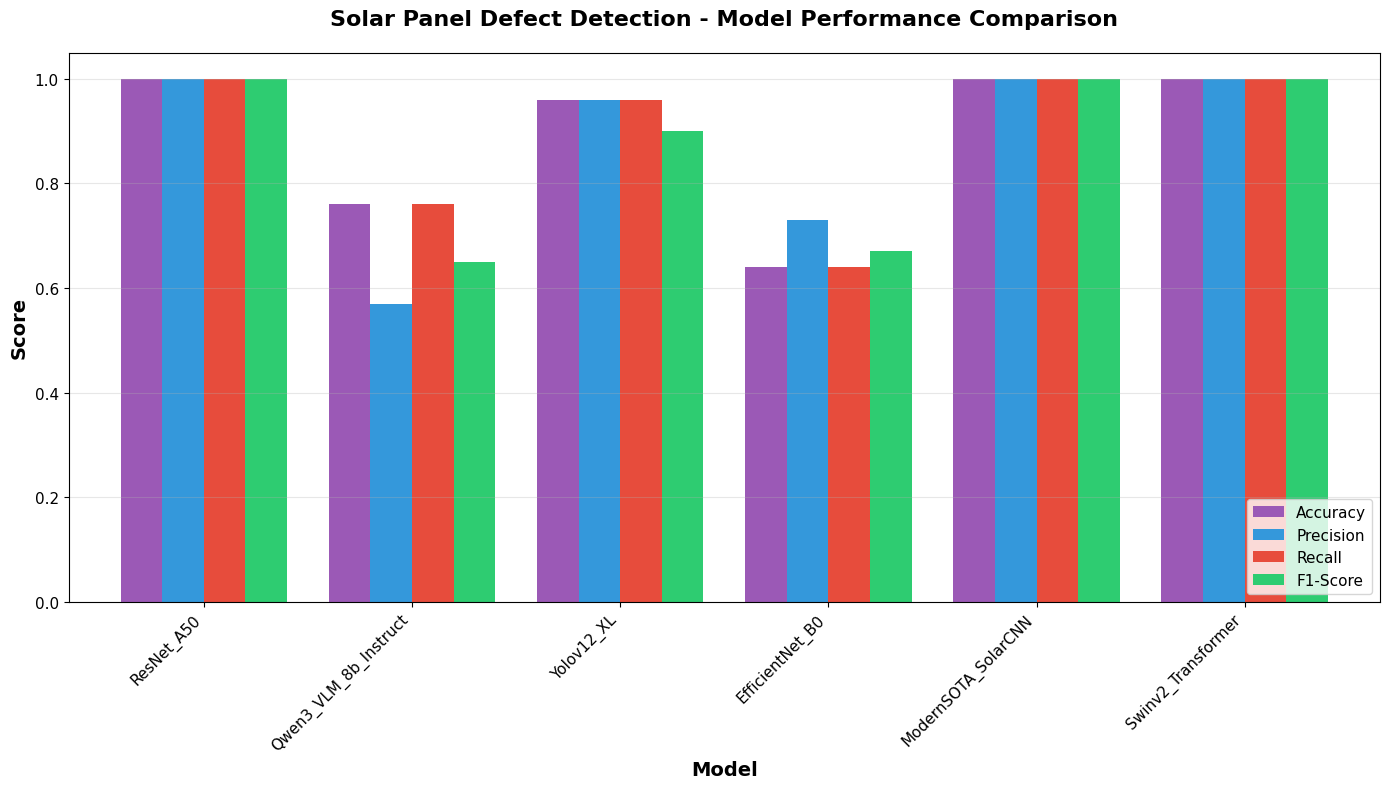

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Your data (transposed so models are rows)
df = pd.DataFrame(model_results).T

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot
df.plot(kind='bar', ax=ax, color=['#9b59b6', '#3498db', '#e74c3c', '#2ecc71'], width=0.8)

# Clean labels
ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Solar Panel Defect Detection - Model Performance Comparison',
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylim(0, 1.05)
ax.legend(['Accuracy', 'Precision', 'Recall', 'F1-Score'],
          fontsize=11, loc='lower right')
ax.grid(axis='y', alpha=0.3)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.savefig('solar_benchmark_results.png', dpi=300, bbox_inches='tight')
plt.show()